## Importing Important Libraries

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import joblib

In [3]:
# Load the dataset
df = pd.read_csv("C:/Users/Asus/OneDrive/Desktop/UM_Heart_Disease/Heart Disease/dataset.csv")

In [4]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


## EDA

In [5]:
df.shape

(1190, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [7]:
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [8]:
df.dtypes

age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [9]:
df['target'].value_counts()

target
1    629
0    561
Name: count, dtype: int64

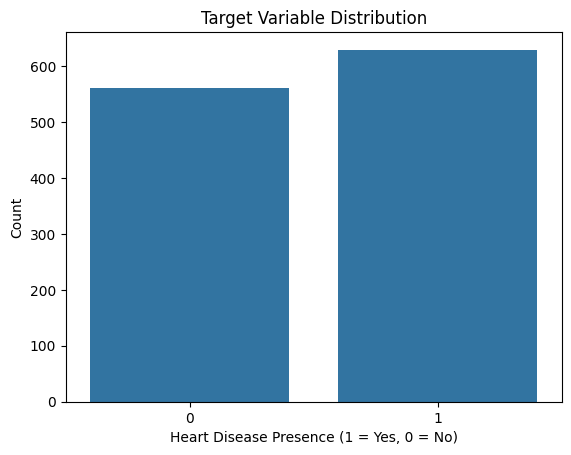

In [10]:
# Target distribution
sns.countplot(data=df, x='target')
plt.title('Target Variable Distribution')
plt.xlabel('Heart Disease Presence (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

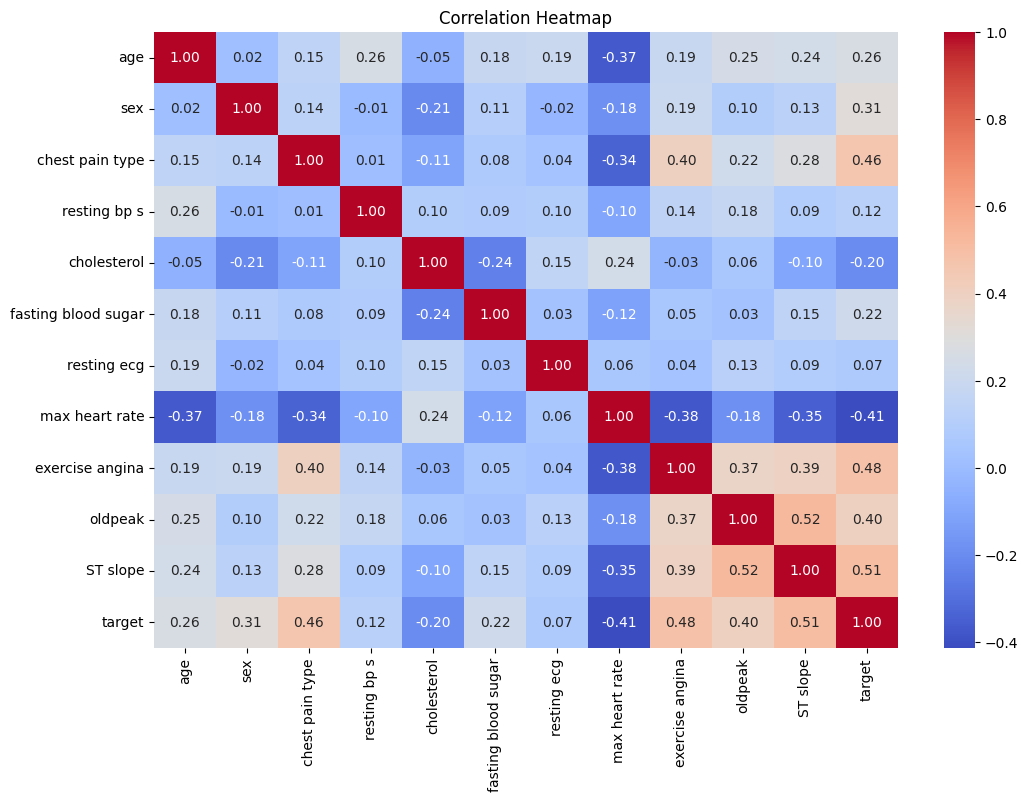

In [11]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


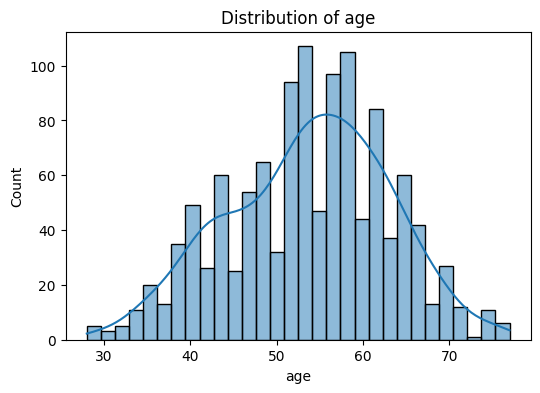

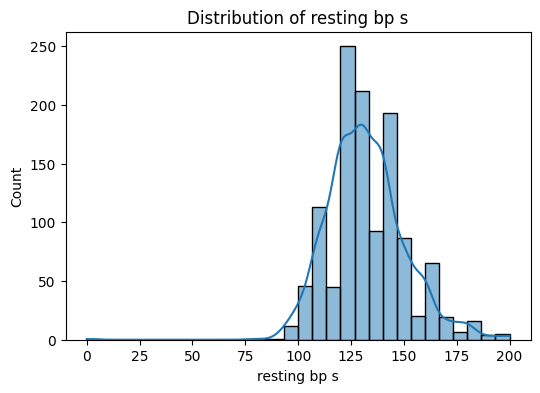

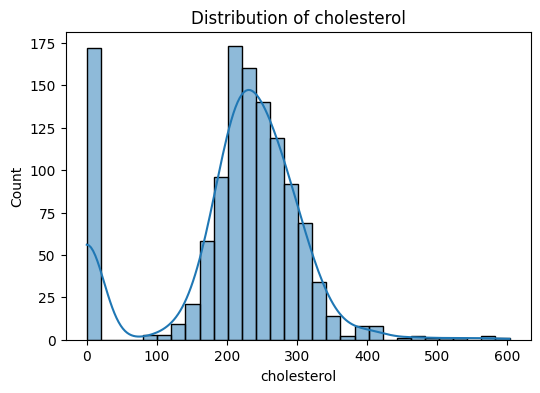

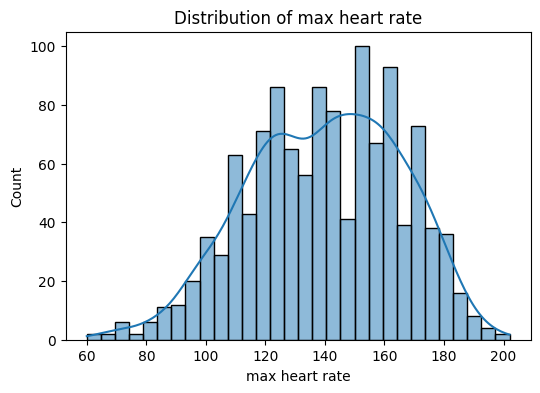

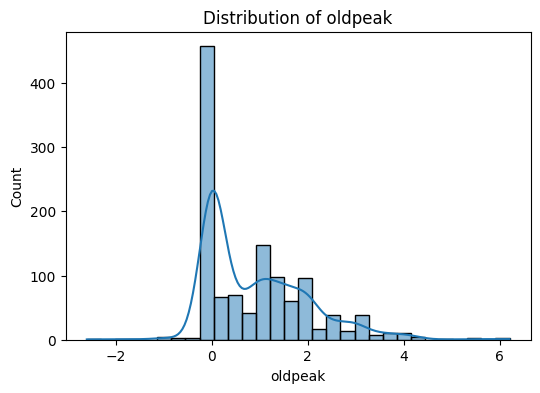

In [12]:
continuous_cols = ["age", "resting bp s", "cholesterol", "max heart rate", "oldpeak"]

for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()


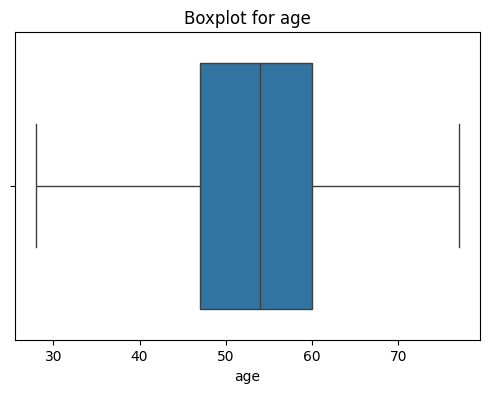

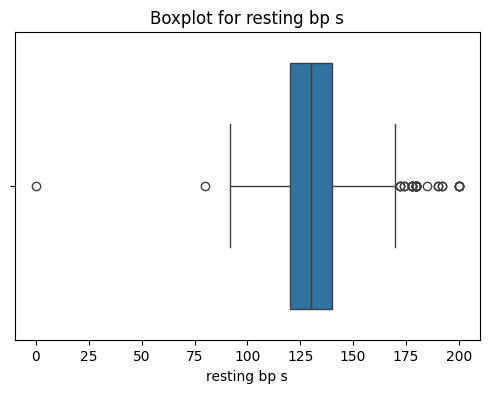

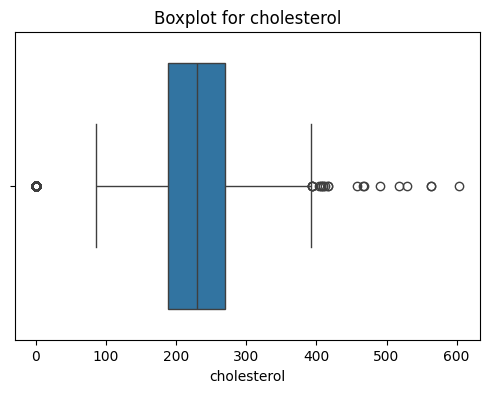

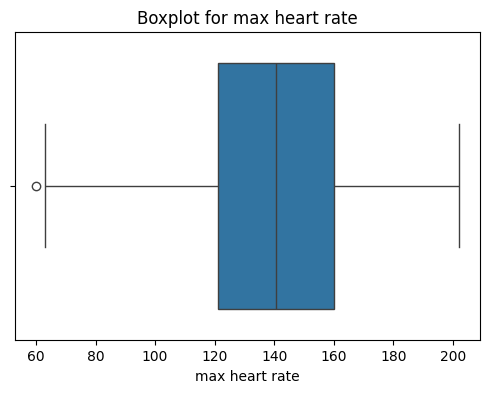

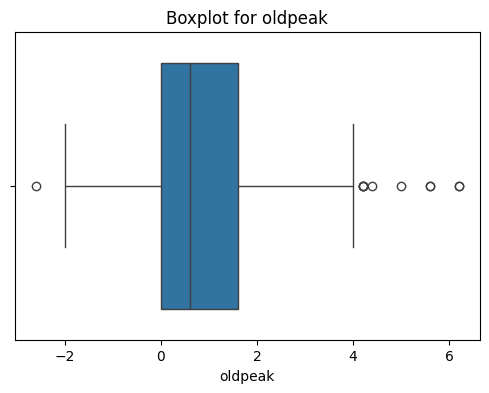

In [13]:
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


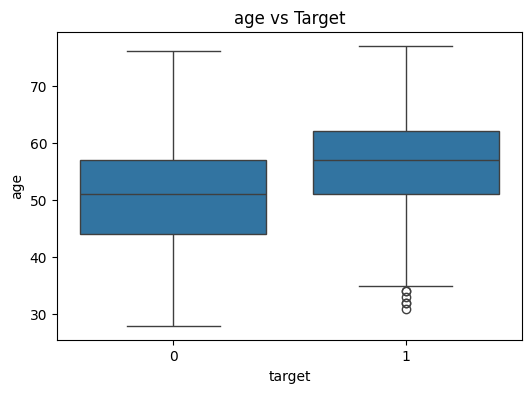

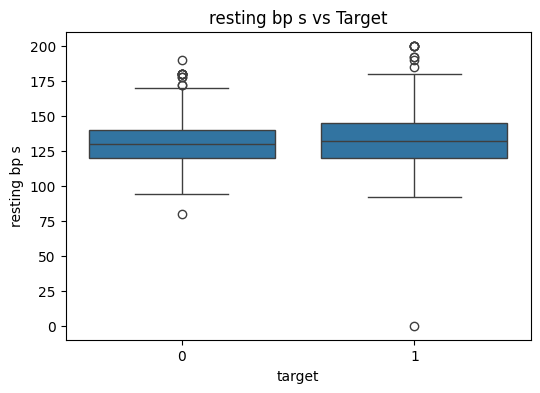

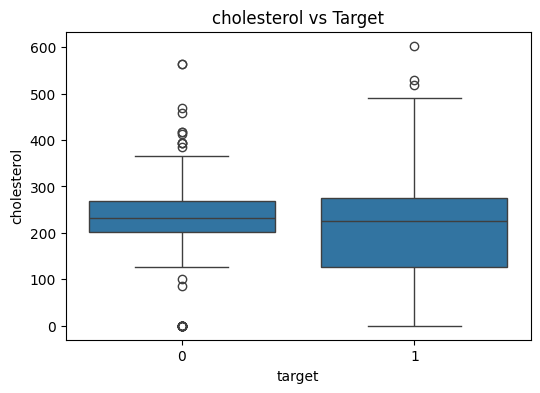

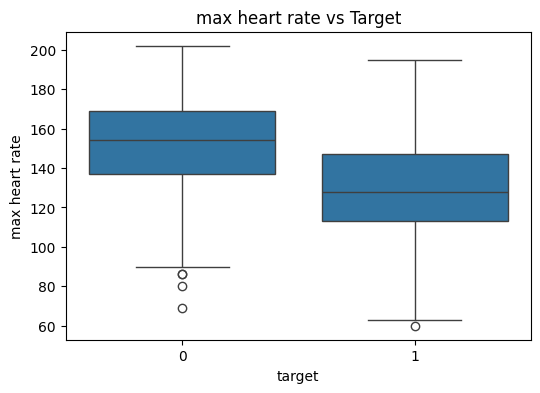

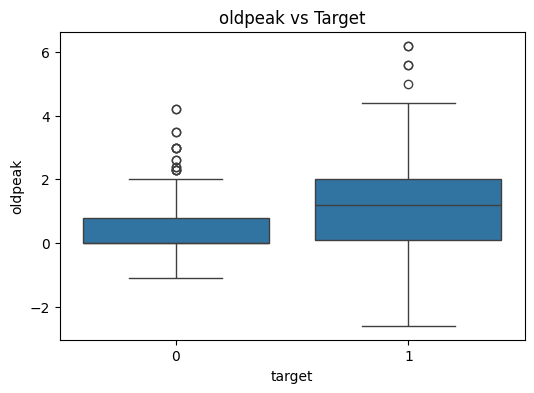

In [14]:
for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='target', y=col, data=df)
    plt.title(f'{col} vs Target')
    plt.show()


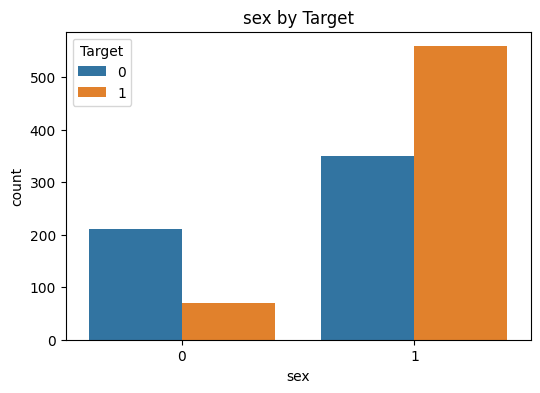

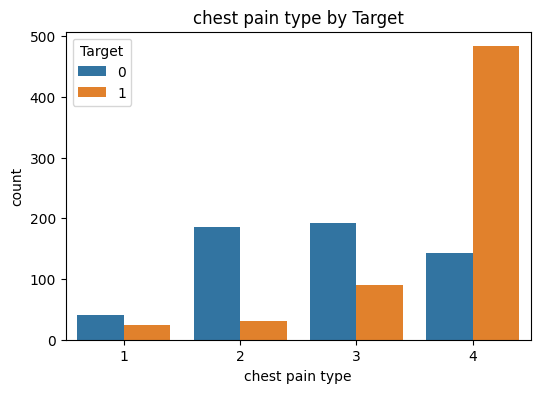

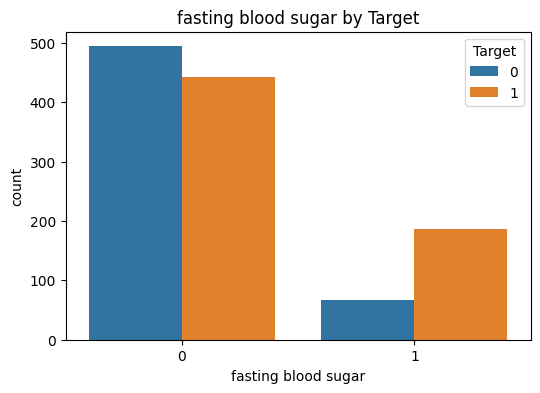

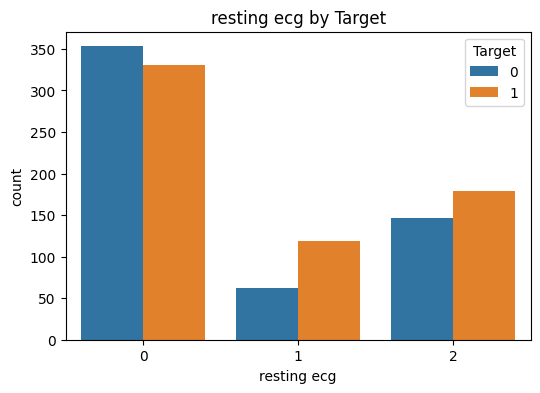

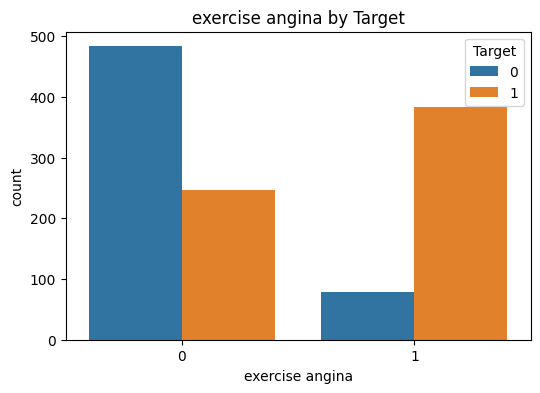

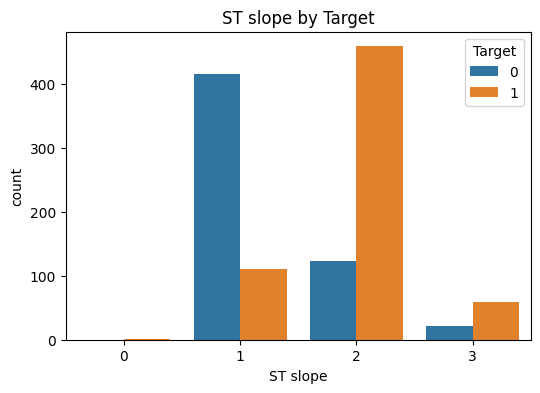

In [15]:
categorical_cols = ["sex", "chest pain type", "fasting blood sugar", "resting ecg", "exercise angina", "ST slope"]

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='target')
    plt.title(f'{col} by Target')
    plt.legend(title='Target')
    plt.show()

In [18]:
# Define features (X) and target (y)
X = df.drop("target", axis=1)
y = df["target"]

## Data Preprocessing

In [19]:
numeric_features = ["age", "resting bp s", "cholesterol", "max heart rate", "oldpeak"]

In [20]:
# Binary features are already 0/1, can be treated as numeric or scaled
binary_features = ["sex", "fasting blood sugar", "exercise angina"]

In [21]:
# Nominal features need one-hot encoding
nominal_features = ["chest pain type", "resting ecg", "ST slope"]

In [22]:
# Create preprocessing pipelines for numeric and categorical features
# Scale numeric features and binary features
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

In [23]:
# One-hot encode nominal features
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown='ignore')) # Corrected quotes
])

In [24]:
# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features + binary_features),
        ("cat", categorical_transformer, nominal_features)
    ],
    remainder='passthrough' # Corrected quotes
)


In [25]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Model Training using - Logistic Regression

In [26]:
print("Training Logistic Regression Model...")
lr_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(random_state=42, max_iter=1000))
])

Training Logistic Regression Model...


In [27]:
lr_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [28]:
y_pred_lr = lr_pipeline.predict(X_test)

In [29]:
y_prob_lr = lr_pipeline.predict_proba(X_test)[:, 1]


## Model Evaluation

In [30]:
print("\n--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("="*50 + "\n")


--- Logistic Regression Evaluation ---
Accuracy: 0.8613
ROC AUC: 0.9302
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       112
           1       0.85      0.89      0.87       126

    accuracy                           0.86       238
   macro avg       0.86      0.86      0.86       238
weighted avg       0.86      0.86      0.86       238

Confusion Matrix:
[[ 93  19]
 [ 14 112]]



## Model Training Using Random Forest

In [32]:
print("Training Random Forest Model...")

Training Random Forest Model...


In [33]:
rf_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, n_estimators=100))
])

In [34]:
rf_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [35]:
y_pred_rf = rf_pipeline.predict(X_test)

In [36]:
y_prob_rf = rf_pipeline.predict_proba(X_test)[:, 1]

## Model Evaluation

In [37]:
print("\n--- Random Forest Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("="*50 + "\n")


--- Random Forest Evaluation ---
Accuracy: 0.9370
ROC AUC: 0.9767
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       112
           1       0.95      0.93      0.94       126

    accuracy                           0.94       238
   macro avg       0.94      0.94      0.94       238
weighted avg       0.94      0.94      0.94       238

Confusion Matrix:
[[106   6]
 [  9 117]]



In [38]:
print("Model training and evaluation complete.")

Model training and evaluation complete.


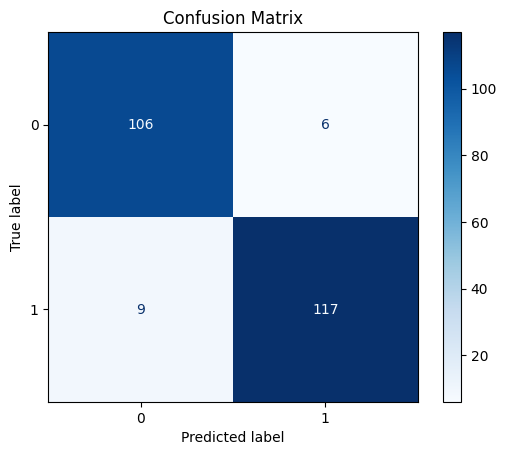

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

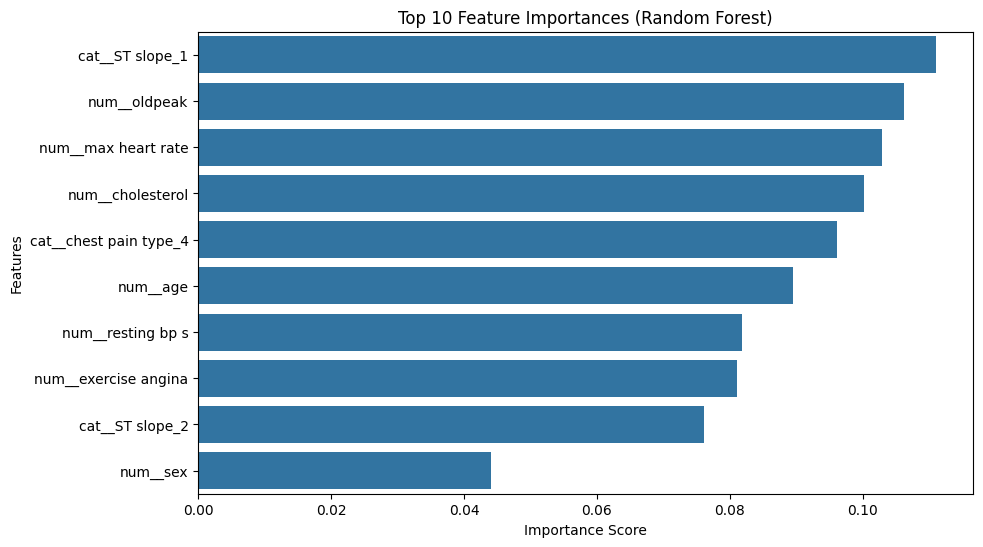

In [41]:
importances = rf_pipeline.named_steps["classifier"].feature_importances_

# Feature names after one-hot encoding
feature_names = rf_pipeline.named_steps["preprocessor"].get_feature_names_out()
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:10], y=feat_imp.index[:10])
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


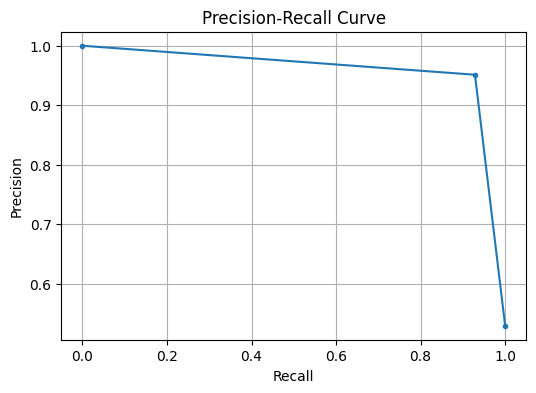

In [43]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


## Model Comparison

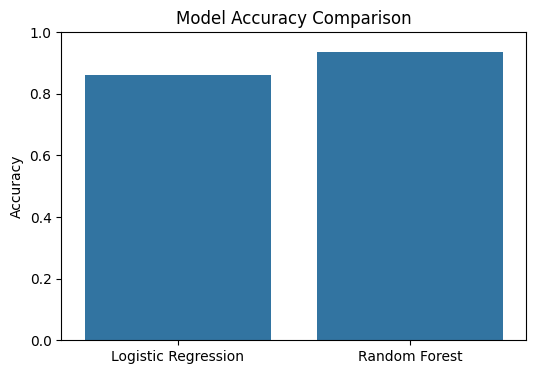

In [44]:
models = ['Logistic Regression', 'Random Forest']
accuracies = [accuracy_score(y_test, lr_pipeline.predict(X_test)),
              accuracy_score(y_test, rf_pipeline.predict(X_test))]

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


In [30]:
joblib.dump(rf_pipeline, 'heart_disease_model.pkl')

['heart_disease_model.pkl']